In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
gender_df = pd.DataFrame({'Title':['Female','Male'],
                         'Percent':[40,60]})

In [4]:
div_df = pd.DataFrame({'Title':['Other Western Hemisphere','US & Canada','Other Europe','Other Asia','Transition Countries','MENA+','East Asia','Sub-Saharan Africa'
],'Percent':[5,30,10,20,5,15,10,5]})

In [5]:
tenure_df = pd.DataFrame({'Title':['0-5 years','5-10 years','>10 years'],
                        'Percent':[40,40,20]})

In [6]:
level_df = pd.DataFrame({'Title':['Manager Level','Senior Level','Junior Level','Entry Level'],
                        'Percent':[10, 20, 30, 40]})

In [7]:
#Function to plot subplot:
def stackedbar_plot(dataframe, number_of_var,color_list, bar_width, 
                    bar_distance, col_label,ax,x_legend,y_legend):
    bp=ax.bar(1, dataframe['Percent'][0],
              label = dataframe['Title'][0], 
              color = color_list[0], 
              width = bar_width, 
              edgecolor = 'white')
    for i in range(1,number_of_var):    
        bp=ax.bar(1, dataframe['Percent'][i], 
                  bottom = dataframe.loc[0:(i-1),'Percent'].sum(), 
                  label = dataframe['Title'][i],
                  color = color_list[i], 
                  width = bar_width, 
                  edgecolor = 'white' )
    
    ax.set_xlabel(col_label)
    ax.legend(loc = 'upper right',bbox_to_anchor=(x_legend,y_legend) )
    return bp

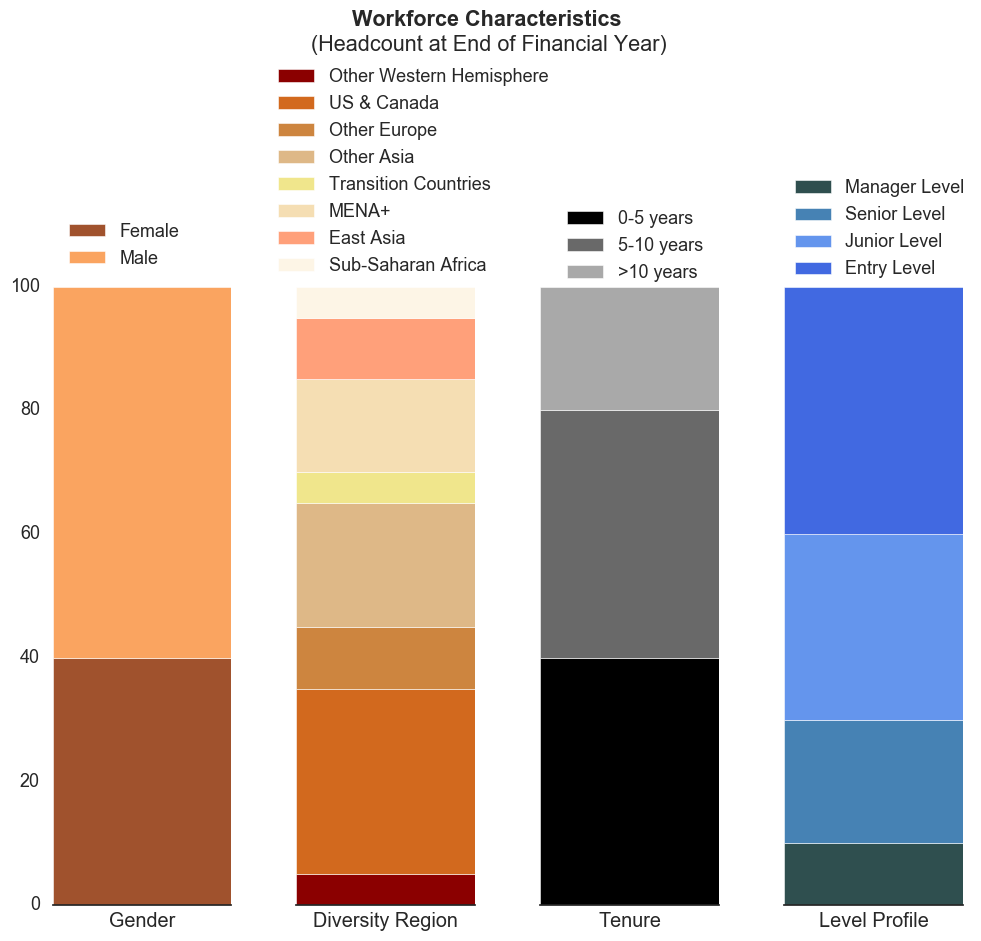

In [24]:
#Produce all the stacked bars plots:
sns.set(style="white", context="talk")
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 7), sharey=True)

bar_width = 2
bar_distance = 1

#subplot1:
x_legend1 = 0.8
y_legend1 = 1.13
color_list1 = ['sienna','sandybrown']
stackedbar_plot(gender_df,2, color_list1, bar_width, bar_distance, 'Gender', ax1, x_legend1, y_legend1)

#subplot2:
x_legend2 = 1.5
y_legend2 = 1.38
color_list2 = ['darkred','chocolate','peru','burlywood','khaki','wheat','lightsalmon','oldlace']
stackedbar_plot(div_df, 8, color_list2, bar_width, bar_distance, 'Diversity Region', ax2,x_legend2, y_legend2)

#subplot3:
x_legend3= 1
y_legend3 = 1.15
color_list3 = ['black','dimgrey','darkgrey']
stackedbar_plot(tenure_df, 3, color_list3, bar_width, bar_distance, 'Tenure', ax3,x_legend3, y_legend3)

#subplot4:
x_legend4 = 1.1
y_legend4 = 1.2
color_list4 = ['darkslategrey','steelblue','cornflowerblue','royalblue']
stackedbar_plot(level_df, 4, color_list4, bar_width, bar_distance, 'Level Profile', ax4,x_legend4, y_legend4)


sns.despine(left = True)
plt.setp(f.axes, xticks=[])
plt.tight_layout(h_pad=3,w_pad =3)
plt.suptitle('Workforce Characteristics',fontweight='bold',x=0.5, y =1.35)
plt.title('(Headcount at End of Financial Year)',x=-1.65, y =1.37)


plt.show()